<a href="https://colab.research.google.com/github/AnanyaUp/Quantum-Machine-Learning/blob/main/QML_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Listing 5.2: Boolean logic in Python
P = True
Q = False

print('not P is {}'.format(not P))
print('P and Q is {}'.format(P and Q))
print('P or Q is {}'.format(P or Q))
print('P and not Q is {}'.format(P and not Q))

not P is False
P and Q is False
P or Q is True
P and not Q is True


In [ ]:
# Listing 5.3: A reimplementation of or
def my_or(p, q):
    return not (not p and not q)

print('P | Q | P or Q')
print('--------------')
print('T | T | {}'.format(my_or(True, True)))
print('T | F | {}'.format(my_or(True, False)))
print('F | T | {}'.format(my_or(False, True)))
print('F | F | {}'.format(my_or(False, False)))

P | Q | P or Q
--------------
T | T | True
T | F | True
F | T | True
F | F | False


In [ ]:
# Listing 5.4: Reversing the qubit states
from math import sqrt

# define the initital states
psi = [0.5, sqrt(3)/2]
always_0 = [1, 0]
always_1 = [0, 1]

def transform(name, state, f):
    print ('{}: [{:.2f}, {:.2f}]  result: [{:.2f}, {:.2f}]'.format(name, *state, *f(state)))

def reverse_state(arr):
    return list(reversed(arr))

print("----------- Reversed states: ----------")
transform("psi", psi, reverse_state)
transform("|0>", always_0, reverse_state)
transform("|1>", always_1, reverse_state)

----------- Reversed states: ----------
psi: [0.50, 0.87]  result: [0.87, 0.50]
|0>: [1.00, 0.00]  result: [0.00, 1.00]
|1>: [0.00, 1.00]  result: [1.00, 0.00]


In [ ]:
!pip install qiskit qiskit-aer pylatexenc

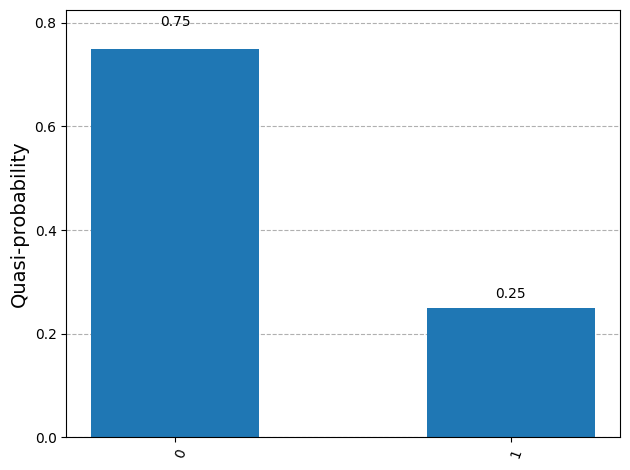

In [ ]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import numpy as np

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Define initial_state
psi = [0.5, np.sqrt(3)/2]
qc.initialize(np.array(psi), 0)

# Apply the X-gate
qc.x(0)

# Explicitly instruct the simulator to save the state vector
qc.save_statevector()

# Explicitly set the simulation method to 'statevector'
# to ensure the result contains the 'statevector' key.
backend = AerSimulator(method='statevector')

# Do the simulation, returning the result
result = backend.run(qc).result()
# This line now works because the backend was configured correctly

counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

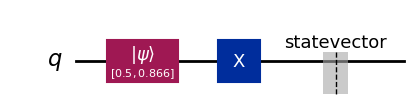

In [ ]:
# Listing 5.6: The measured qubit
qc.draw('mpl')

In [ ]:
# Listing 5.7: Self‐made reverse function
def adjust_weight(state, weights):
    return state[0]*weights[0]+state[1]*weights[1]

print ('reversed psi: [{:.2f}, {:.2f}]'.format(
    adjust_weight(psi, [0,1]),
    adjust_weight(psi, [1,0])
))

reversed psi: [0.87, 0.50]


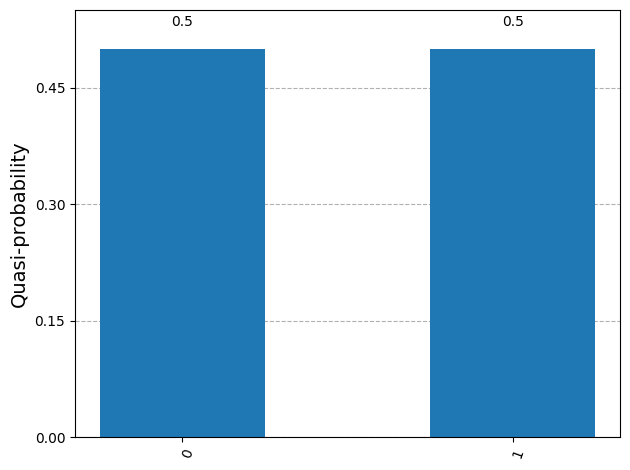

In [ ]:
# Listing 5.8: The Hadamard gate
import matplotlib.pyplot as plt

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Define initial_state as |0>
initial_state = [1,0]
qc.initialize(initial_state, 0)

# apply the Hadamard gate to the qubit
qc.h(0)

# Tell Qiskit how to simulate our circuit
qc.save_statevector()
backend = AerSimulator(method='statevector')

# Do the simulation, returning the result
result = backend.run(qc).result()

# get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

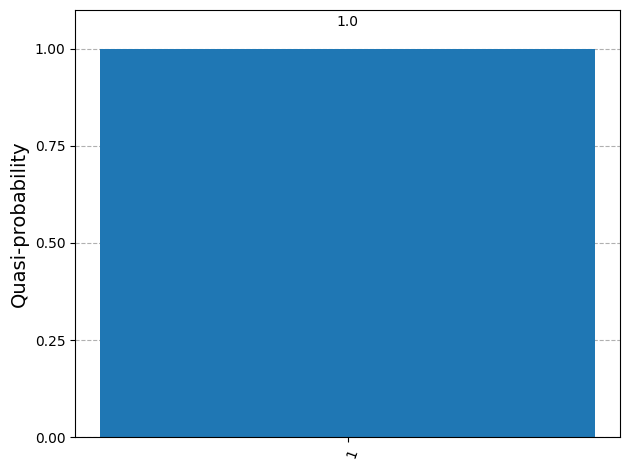

In [ ]:
# Listing 5.9: The Hadamard gate reverses itself
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Define initial_state as |1>
initial_state = [0, 1]
qc.initialize(initial_state, 0)

# apply the Hadamard gate to the qubit
qc.h(0)

# apply the Hadamard gate again to reverse it
qc.h(0)

# Tell Qiskit how to simulate our circuit
qc.save_statevector()
backend = AerSimulator(method='statevector')

# Do the simulation, returning the result
result = backend.run(qc).result()

# get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

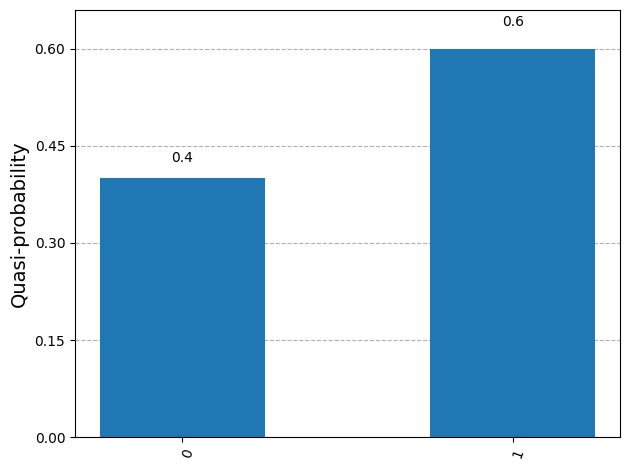

In [ ]:
# Listing 5.10: Weighted initial state

from math import sqrt

# Define state |psi>
initial_state = [sqrt(0.4), sqrt(0.6)]

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0)

# Tell Qiskit how to simulate our circuit
qc.save_statevector()
backend = AerSimulator(method='statevector')

# Do the simulation, returning the result
result = backend.run(qc).result()

# get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)


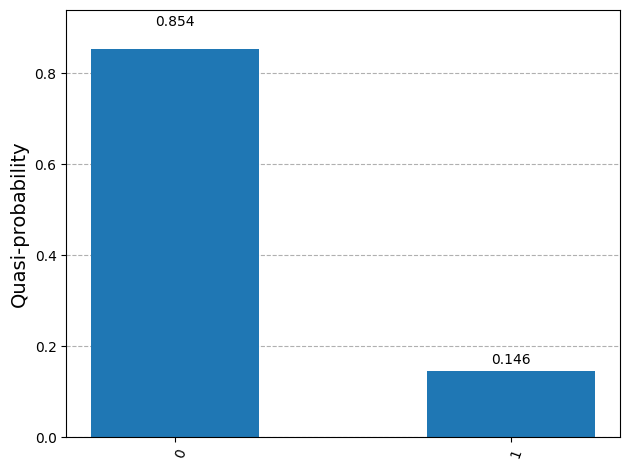

In [ ]:
# Listing 5.11: Rotate the qubit state
from math import pi

# Define state |0>
initial_state = [1, 0]

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0)

# Rotate the state by a quarter of a half circle.
qc.ry(pi/4,0)

# Tell Qiskit how to simulate our circuit
qc.save_statevector()
backend = AerSimulator(method='statevector')

# Do the simulation, returning the result
result = backend.run(qc).result()

# get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

In [ ]:
# Listing 5.12: Calculate the angle that represents a certain probability
from math import asin

def prob_to_angle(prob):
    """
    Converts a given P(psi) value into an equivalent theta value.
    """
    return 2*asin(sqrt(prob))

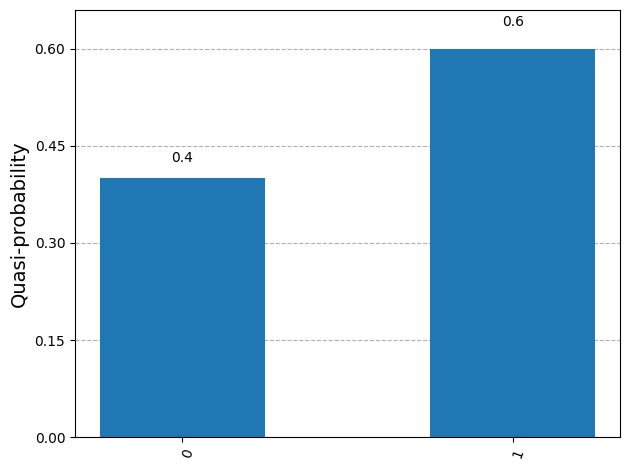

In [ ]:
# Listing 5.13: Rotate the qubit state
# Define state |0>
initial_state = [1,0]

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0)

# Rotate the state by 60%
qc.ry(prob_to_angle(0.6), 0)

# Tell Qiskit how to simulate our circuit
qc.save_statevector()
backend = AerSimulator(method='statevector')

# Do the simulation, returning the result
result = backend.run(qc).result()

# get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

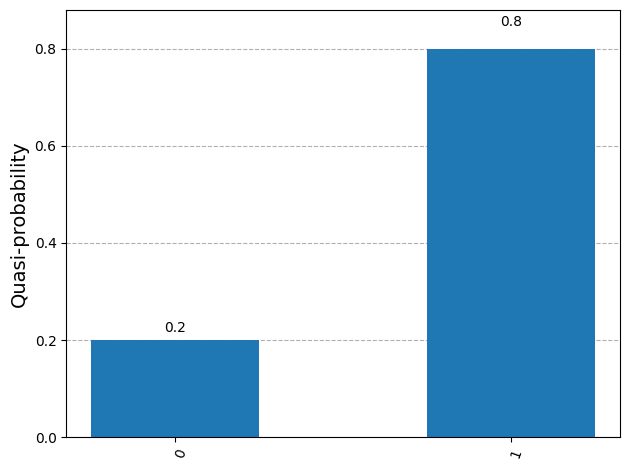

In [ ]:
# Listing 5.14: Rotate the qubit state with initial state
# Define state |+>
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0)

# Rotate the state by 10%
qc.ry(prob_to_angle(0.1), 0)

# Tell Qiskit how to simulate our circuit
qc.save_statevector()
backend = AerSimulator(method='statevector')

# Do the simulation, returning the result
result = backend.run(qc).result()

# get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

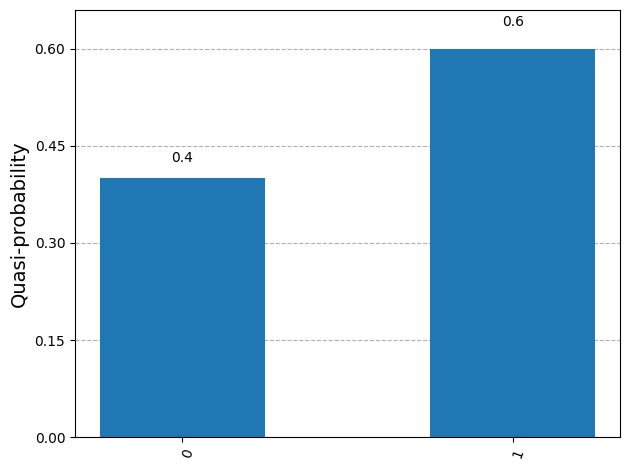

In [ ]:
# Listing 5.15: Rotate the qubit state correctly
def prob_to_angle_with_prior(prob, prior):
    """
    Converts a given P(psi) value into an equivalent theta value.
    """
    return 2*asin(sqrt(prob+prior))-2*asin(sqrt(prior))

# Define state |+>
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0)

# Rotate the state by 10%
qc.ry(prob_to_angle_with_prior(0.1, 0.5), 0)

# Tell Qiskit how to simulate our circuit
qc.save_statevector()
backend = AerSimulator(method='statevector')

# Do the simulation, returning the result
result = backend.run(qc).result()

# get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)